In [1]:
import sys
import os
import logging
logging.basicConfig(level=logging.ERROR)
import matplotlib.pyplot as plt
from taurex.log import setLogLevel,disableLogging
disableLogging()

taurex - INFO - Root logger initialized


In [2]:
from taurex.model import *
from taurex.data.profiles.chemistry import TaurexChemistry,ConstantGas,TwoLayerGas,ACEChemistry
from taurex.data.profiles.temperature import *
from taurex.contributions import *
import numpy as np

In [3]:
from taurex.cache import OpacityCache,CIACache
OpacityCache().set_opacity_path('/Users/ahmed/Documents/taurex_files/taurex_cobweb/Input/xsec/TauRex_sampled_xsecs_R10000_0.3-15')
CIACache().set_cia_path('/Users/ahmed/Documents/taurex_files/taurex_cobweb/Input/cia/hitran/data')
OpacityCache().clear_cache()

In [4]:

chemistry = TaurexChemistry()
chemistry.addGas(TwoLayerGas('H2O'))
chemistry.addGas(TwoLayerGas('CH4'))
chemistry.addGas(ConstantGas('N2',mix_ratio=1e-7))
temperature = Guillot2010(T_irr=1500)

tm = EmissionModel(chemistry=chemistry,temperature_profile=temperature,atm_min_pressure=1e-4,atm_max_pressure=1e6,nlayers=20)

tm.add_contribution(AbsorptionContribution())
tm.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He','N2-N2','N2-H2O']))
tm.add_contribution(RayleighContribution())
tm.build()



#anothertm.build()



In [5]:
tm.set_num_gauss(1)
%timeit tm.model()

139 ms ± 3.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
tm.set_num_gauss(2)
%timeit tm.model()

134 ms ± 662 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
tm.set_num_gauss(4)
%timeit tm.model()

140 ms ± 600 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
tm.set_num_gauss(8)
%timeit tm.model()

154 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>


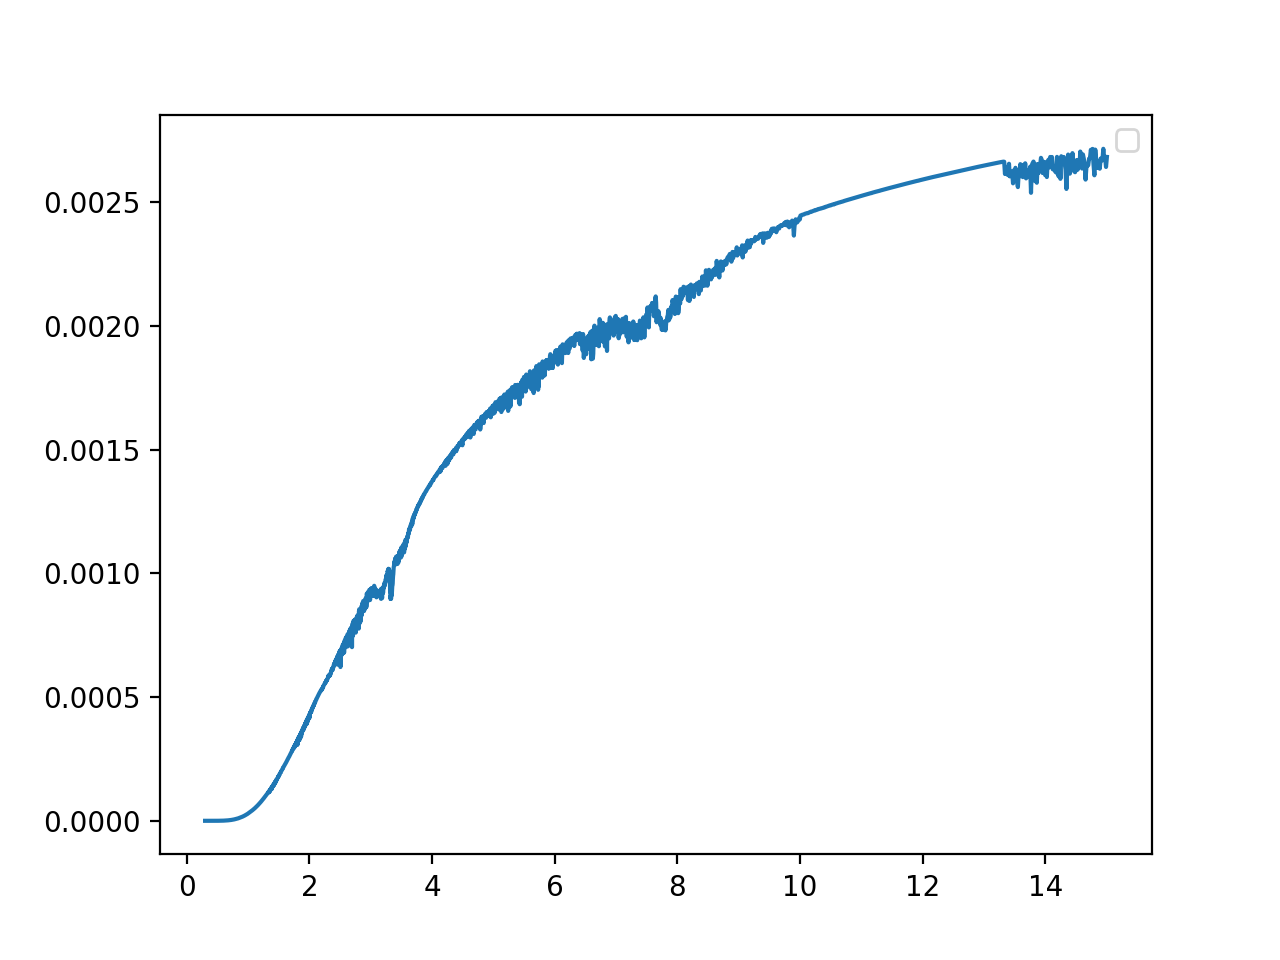

interactive(children=(IntSlider(value=4, description='ngauss', max=20, min=1), Output()), _dom_classes=('widge…

In [10]:
from ipywidgets import interact
%matplotlib notebook
min_wn = tm.nativeWavenumberGrid.min()
max_wn = tm.nativeWavenumberGrid.max()
wngrid = np.sort(np.logspace(np.log10(min_wn),np.log10(max_wn),4000))
#print(wngrid)
#wngrid = tm.nativeWavenumberGrid
wlgrid = 10000/wngrid


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
real = plt.plot(wlgrid,tm.model(wngrid=wngrid,return_contrib=False)[0])[0]


def update(ngauss=4):
    tm.set_num_gauss(ngauss)
    absorp=tm.model(wngrid=wngrid,return_contrib=False)[0]
    
    real.set_ydata(absorp)
    # recompute the ax.dataLim
    
    ax.relim()
    ax.legend()
    # update ax.viewLim using the new dataLim
    ax.autoscale_view()
    fig.canvas.draw()

interact(update,ngauss=(1,20));